# QUESTION 1

I chose "Death rates for suicide by sex, race, Hispanic origin and age: United States" which provides critical information about suicide rates in the United States categorized by demographic factors such as sex, race, and age.


# CODE for QUESTION 1

In [ ]:
# Uploading the DeathRates_Sex.csv file
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing readr, tidyverse in R
!Rscript -e "install.packages('readr')"
!Rscript -e "install.packages('tidyverse')"
!Rscript -e "install.packages('ggplot2')"



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB

* installing *source* package ‘readr’ ...
** package ‘readr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’
using C++ compiler: ‘g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/lib/R/site-library/cpp11/include' -I'/usr/lib/R/site-library/tzdb/include'     -fpic  -g -O2 -ffile-prefix-map=/build/r-base-6tgf7J/r-base-4.4.2=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2   -c Collector.cpp -o Collector.o
g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG  -I'/usr/lib/R/site-library/cpp11/include' -I'/usr/lib/R/site-library/tzdb/include'     -fpic  -g -O2 -ffile-prefix-ma

In [ ]:
# QUESTION 1

# Loading the data/handling missing values
library(readr)
DeathRates_Sex <- read_csv("/content/drive/My Drive/DeathRates_Sex.csv",
                           col_types = cols(
                             INDICATOR = col_character(),
                             UNIT = col_character(),
                             STUB_NAME = col_character(),
                             STUB_LABEL = col_character(),
                             AGE = col_character(),
                             ESTIMATE = col_double(),  # Ensures ESTIMATE = numeric
                             YEAR = col_double()       # Ensures YEAR = numeric
                           ),
                           na = c("NA", "missing", "")  # Handling missing values
)

# Correcting parsing issues in the data I chose
problems(DeathRates_Sex)
print(head(DeathRates_Sex))



row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>


# A tibble: 6 × 13
  INDICATOR     UNIT  UNIT_NUM STUB_NAME STUB_NAME_NUM STUB_LABEL STUB_LABEL_NUM
  <chr>         <chr>    <dbl> <chr>             <dbl> <chr>               <dbl>
1 Death rates … Deat…        1 Total                 0 All perso…              0
2 Death rates … Deat…        1 Total                 0 All perso…              0
3 Death rates … Deat…        1 Total                 0 All perso…              0
4 Death rates … Deat…        1 Total                 0 All perso…              0
5 Death rates … Deat…        1 Total                 0 All perso…              0
6 Death rates … Deat…        1 Total                 0 All perso…              0
# ℹ 6 more variables: YEAR <dbl>, YEAR_NUM <dbl>, AGE <chr>, AGE_NUM <dbl>,
#   ESTIMATE <dbl>, FLAG <chr>


 # QUESTION 2

MetaData:

Producer: National Center for Health Statistics which is part of the Center for Disease Control and Prevention

Variables:
STUB_NAME/categorical- demographic category like sex and race

STUB_NAME_NUMBER/numerical-
 representation of the demographic indicator

STUB_LABEL/categorical-
description for demographic indicator

STUB_LABEL_NUMBER/numerical-  representation of the label

YEAR/categorical-
year the data pertains to

YEAR_NUM/numerical-
representation of the year

AGE/categorical- age group of population

AGE_NUM/numerical-  
representation of the age group

ESTIMATE/numerical-
estimated death rate or count for suicide

FLAG/categorical-
indicators for data quality or special notes



Units: number of feaths per 100,000 indivuals in a population

Date of creation: Last updated on April 28th, 2022

Location: United States encompassing various demographics such as sex, race and age

Data collection:

National Vital Statistics System: compiles vital stats from death certificates

NVSS annual public-use Mortality Files: numerator data

US Census Bureau national population estimates: denomintor data

Deaths: Final Data for 2018: stats reports like these provide context and detail


# QUESTION 3

My reserach questions I can use:
-What type of car has the highest city MPG?

- Which demographic group has the highest suicide rates?

- How do suicide rates vary over the years?

- What is the relationship between age and suicide rates?

- Are there significant differences in suicide rates between males and females?

- Do suicide rates differ by race of hispanic origin?

- What % of total suicide rates does each demographic group represent

- How do suicide rates in the US compares to other countries

# CODE for QUESTION 4

In [ ]:
# QUESTION 4

# Loading library
library(tidyverse)

# Inspecting  Data
str(DeathRates_Sex) # Data set structure
summary(DeathRates_Sex) # Summary stats
missing_values <- colSums(is.na(DeathRates_Sex))
print(missing_values)  # Missing values check


# Data cleaning
cleaned_data <- DeathRates_Sex %>%
  filter(!is.na(ESTIMATE)) # Removing NA in the ESTIMATE column

  # Converting columns to factors so it's easier to analyze
cleaned_data <- cleaned_data %>%
  mutate(
    STUB_NAME = as.factor(STUB_NAME),
    AGE = as.factor(AGE),
    YEAR = as.factor(YEAR)
  )


# Data exploring

  # Grouping by YEAR and STUB_NAME, and summarizing average death rates
summary_data <- cleaned_data %>%
  group_by(YEAR, STUB_NAME) %>%
  summarise(
    Average_Estimate = mean(ESTIMATE, na.rm = TRUE),  # Calculating average death estimate
    Count = n(),                                       # Counting the number of entries in each group
    .groups = 'drop'                                   # Removing grouping after summarizing
  )

print(summary_data)


# Variables

  # Calculating total deaths for each year
total_deaths <- cleaned_data %>%
  group_by(YEAR) %>%
  summarise(Total_Deaths = sum(ESTIMATE, na.rm = TRUE))  # Adding estimates to get total deaths

  # Calculating percentages of total deaths by STUB_NAME
cleaned_data <- cleaned_data %>%
  left_join(total_deaths, by = "YEAR") %>%
  mutate(Percentage = (ESTIMATE / Total_Deaths) * 100)  # Calculating % of total deaths


# Final Cleaned Data
print(head(cleaned_data))
summary(cleaned_data)


spc_tbl_ [6,390 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ INDICATOR     : chr [1:6390] "Death rates for suicide" "Death rates for suicide" "Death rates for suicide" "Death rates for suicide" ...
 $ UNIT          : chr [1:6390] "Deaths per 100,000 resident population, age-adjusted" "Deaths per 100,000 resident population, age-adjusted" "Deaths per 100,000 resident population, age-adjusted" "Deaths per 100,000 resident population, age-adjusted" ...
 $ UNIT_NUM      : num [1:6390] 1 1 1 1 1 1 1 1 1 1 ...
 $ STUB_NAME     : chr [1:6390] "Total" "Total" "Total" "Total" ...
 $ STUB_NAME_NUM : num [1:6390] 0 0 0 0 0 0 0 0 0 0 ...
 $ STUB_LABEL    : chr [1:6390] "All persons" "All persons" "All persons" "All persons" ...
 $ STUB_LABEL_NUM: num [1:6390] 0 0 0 0 0 0 0 0 0 0 ...
 $ YEAR          : num [1:6390] 1950 1960 1970 1980 1981 ...
 $ YEAR_NUM      : num [1:6390] 1 2 3 4 5 6 7 8 9 10 ...
 $ AGE           : chr [1:6390] "All ages" "All ages" "All ages" "All ages" ...
 $ AGE_NUM      

  INDICATOR             UNIT              UNIT_NUM      STUB_NAME        
 Length:6390        Length:6390        Min.   :1.000   Length:6390       
 Class :character   Class :character   1st Qu.:2.000   Class :character  
 Mode  :character   Mode  :character   Median :2.000   Mode  :character  
                                       Mean   :1.873                     
                                       3rd Qu.:2.000                     
                                       Max.   :2.000                     
                                                                         
 STUB_NAME_NUM     STUB_LABEL        STUB_LABEL_NUM       YEAR     
 Min.   : 0.000   Length:6390        Min.   :0.000   Min.   :1950  
 1st Qu.: 3.000   Class :character   1st Qu.:3.230   1st Qu.:1988  
 Median : 5.000   Mode  :character   Median :5.125   Median :1999  
 Mean   : 4.622                      Mean   :4.687   Mean   :1998  
 3rd Qu.: 6.000                      3rd Qu.:6.153   3rd Qu.:2009  


     INDICATOR           UNIT       UNIT_NUM      STUB_NAME  STUB_NAME_NUM 
             0              0              0              0              0 
    STUB_LABEL STUB_LABEL_NUM           YEAR       YEAR_NUM            AGE 
             0              0              0              0              0 
       AGE_NUM       ESTIMATE           FLAG 
             0            906           5484 
# A tibble: 324 × 4
   YEAR  STUB_NAME         Average_Estimate Count
   <fct> <fct>                        <dbl> <int>
 1 1950  Age                          17.1     14
 2 1950  Sex                          12.4      4
 3 1950  Sex and age                  18.4     27
 4 1950  Sex and race                  8.74     8
 5 1950  Sex, age and race            20.0     19
 6 1950  Total                        12.3      2
 7 1960  Age                          15.8     14
 8 1960  Sex                          11.8      4
 9 1960  Sex and age                  17.3     27
10 1960  Sex and race             

  INDICATOR             UNIT              UNIT_NUM    
 Length:5484        Length:5484        Min.   :1.000  
 Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :2.000  
                                       Mean   :1.868  
                                       3rd Qu.:2.000  
                                       Max.   :2.000  
                                                      
                                 STUB_NAME    STUB_NAME_NUM  
 Sex, age and race                    :1282   Min.   : 0.00  
 Sex and age                          :1174   1st Qu.: 3.00  
 Sex, age and race and Hispanic origin: 952   Median : 5.00  
 Sex and race                         : 624   Mean   : 4.39  
 Age                                  : 588   3rd Qu.: 6.00  
 Sex and race and Hispanic origin     : 512   Max.   :11.00  
 (Other)                              : 352                  
  STUB_LABEL        STUB_LABEL_NUM       YEAR         YEAR_NUM  

# CODE for QUESTION 5

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


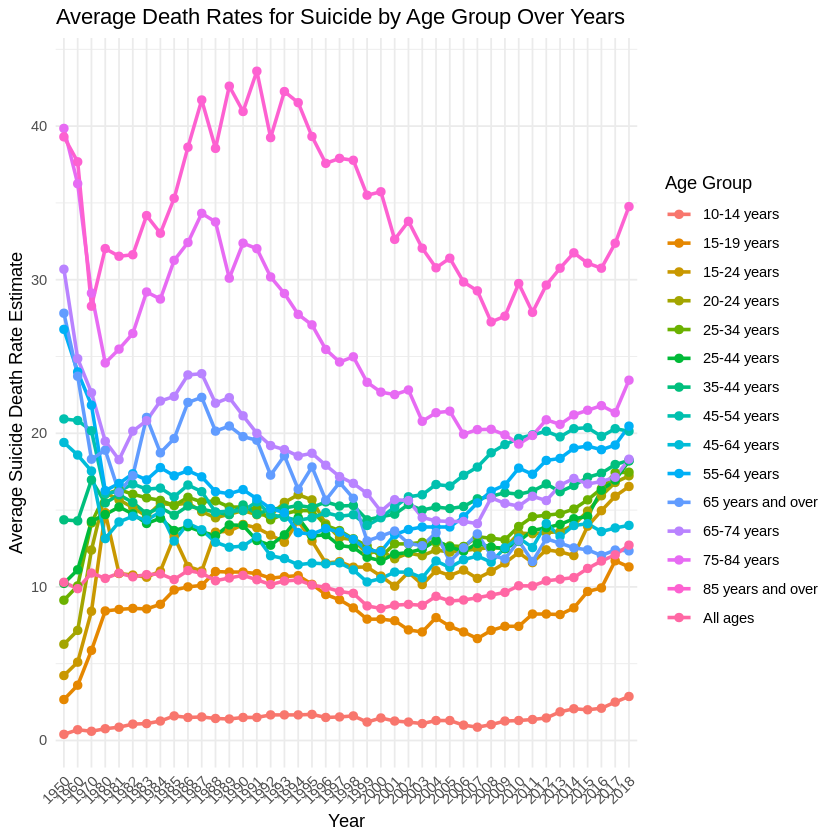

In [ ]:
# QUESTION 5

library(ggplot2)

# Calculating avg death rates by age group and year

average_death_rates <- cleaned_data %>%
  group_by(YEAR, AGE) %>%
  summarise(Average_Estimate = mean(ESTIMATE, na.rm = TRUE))


# Creating line plot to visualize average death rates over the years for each age group

ggplot(average_death_rates, aes(x = YEAR, y = Average_Estimate, color = AGE, group = AGE)) +
  geom_line(linewidth = 1) +  # Changed size to linewidth
  geom_point(size = 2) +
  labs(title = "Average Death Rates for Suicide by Age Group Over Years",
       x = "Year",
       y = "Average Suicide Death Rate Estimate",
       color = "Age Group") +  # Legend label
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

For this project analysis, I chose the Death Rates for Suicide in the US dataset, which provides critical information about suicide rates across different demographic groups, including sex, race, and age. The dataset was sourced from the NCHS and is updated regularly to reflect current trends and patterns in public health.

When loading the dataset into R using readr, I began data cleaning. I inspected the dataset's structure to understand the variable types and identify any missing values. I discovered several columns that contain NA values, especially in the ESTIMATE column, which represents the death rate. To ensure more accuracy, I filtered out these rows. Also, I converted categorical variables like STUB_NAME, AGE, and YEAR into factors to facilitate better handling of these variables in analysis.

Exploring the data involved summarizing and grouping the information to identify groups and patterns. I used the dplyr package to calculate the average death rates by age group and sex over the years. This allowed me to see how different demographics were affected by the suicide rates. I created visualizations using the ggplot2 library to illustrate these findings effectively. For example, a line plot was generated to show trends in average death rates by age group, which revealed significant disparities among various age categories.

From this analysis, I learned that suicide rates differ across demographic groups. Notably, as mentioned, certain age groups exhibited higher death rates, highlighting vulnerable populations that might require targeted interventions or support. These visualizations underscore how important it is to consider demographic factors when addressing public health issues related to mental health.

However, there are some limitations to this dataset. While it provides valuable insights, it lacks additional contextual information such as socioeconomic status, geographic location, and temporal data related to significant social events or crises. These missing elements could enable a more nuanced understanding of factors contributing to suicide rates. Also, the dataset doesn't provide information on mental health resources or intervention strategies available to these populations, which could be essential for comprehensive public health planning.

In conclusion, the Death Rates for Suicide by Sex, Race, Hispanic Origin, and Age: United States dataset serves as a resource for understanding public health trends. By exploring and visualizing the data, I can identify key demographic factors influencing suicide rates, although further research incorporating additional variables would enhance my conclusions.# QUESTION 6
